In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Loading the dataset from Excel file
df = pd.read_excel("INST354_Group_Project_v3.xlsx",header = 1)
df.columns = df.columns.str.strip()  # Strip spaces from column names

# Convert 'DATE_STARTED' column to datetime
df['DATE_STARTED'] = pd.to_datetime(df['DATE_STARTED'])

# Calculate the current year
current_year = pd.Timestamp.now().year

# Calculate years of employment
df['Years_of_Employment'] = current_year - df['DATE_STARTED'].dt.year

# Define bin thresholds and labels
bin_thresholds = [0, 5, 10, float('inf')]
bin_labels = ['1 to 5 years', '5 to 10 years', '10+ years']

# Use pd.cut to create bins for 'Years_of_Employment'
df['Start_Year_Range'] = pd.cut(df['Years_of_Employment'], bins=bin_thresholds, labels=bin_labels, right=False)

# Encode 'SEX' column: Male as 1, Female as 0
df['SEX'] = df['SEX'].replace({'M': 1, 'F': 0})

# Encode 'ETHNICITY' column: 1 for 'White (Not of Hispanic Origin)', 0 for all other values
df['ETHNICITY'] = df['ETHNICITY'].apply(lambda x: 1 if x == 'White (Not of Hispanic Origin)' else 0)

# Create a new column 'Received_Overtime_Pay' where 1 indicates received overtime pay, and 0 indicates not
df['Received_Overtime_Pay'] = df['OVERTIME_PAY'].apply(lambda x: 1 if x > 0 else 0)

# Create a new column 'Received_Incentive_Pay' where 1 indicates received incentive pay, and 0 indicates not
df['Received_Incentive_Pay'] = df['INCENTIVE_PAY'].apply(lambda x: 1 if x > 0 else 0)

# Define bin thresholds and labels for average salary
average_salary_bin_thresholds = [0, 40000, 60000, float('inf')]
average_salary_bin_labels = ['Low', 'Medium', 'High']

# Use pd.cut to create bins for average salary
df['Average_Salary_Bins'] = pd.cut(df['ANNUAL_SALARY'], bins=average_salary_bin_thresholds, labels=average_salary_bin_labels, right=False)

# One-hot encode the categorical columns
X = pd.get_dummies(df[['SEX', 'ETHNICITY', 'Received_Overtime_Pay', 'Received_Incentive_Pay']], drop_first=True)

# Assuming 'DEPARTMENT' is also a categorical feature that needs encoding
X = pd.concat([X, pd.get_dummies(df['DEPARTMENT'], prefix='Dept')], axis=1)

# Encode 'Start_Year_Range' as well
X = pd.concat([X, pd.get_dummies(df['Start_Year_Range'], prefix='Start_Year')], axis=1)
df

,DEPARTMENT,DATE_STARTED,SEX,ETHNICITY,ANNUAL_SALARY,OVERTIME_PAY,INCENTIVE_PAY,Years_of_Employment,Start_Year_Range,Received_Overtime_Pay,Received_Incentive_Pay,Average_Salary_Bins
0,Human Services,2021-12-20,0,1,35096.88,531.53,100.0,2,1 to 5 years,1,1,Low
1,Information Technology,2021-12-20,1,1,41600.00,1020.00,100.0,2,1 to 5 years,1,1,Medium
2,Health,2021-12-20,0,0,54999.98,52.88,100.0,2,1 to 5 years,1,1,Medium
3,Kane Regional Centers,2021-12-20,0,0,29120.00,4979.66,0.0,2,1 to 5 years,1,0,Low
4,Jail,2021-12-19,1,1,43761.54,5507.02,0.0,2,1 to 5 years,1,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
4125,Human Services,1976-05-10,0,1,61246.43,412.24,0.0,47,10+ years,1,0,High
4126,Treasurer,1976-02-17,0,1,65868.19,0.00,0.0,47,10+ years,0,0,High
4127,Human Services,1973-09-16,0,1,38795.74,0.00,0.0,50,10+ years,0,0,Low
4128,Court Records,1973-06-01,0,1,52701.17,0.00,125.0,50,10+ years,0,1,Medium


In [42]:
#Select our target
X = df.drop("Average_Salary_Bins", axis=1)
y = df["Average_Salary_Bins"]

In [43]:
#Removing non-numeric values
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)

In [44]:
def train_and_evaluate(X, y):
   # Splitting data into training and testing sets
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)


   # Initialize and fit the StandardScaler
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_test_scaled = scaler.transform(X_test)


   # Logistic Regression with increased number of iterations
   logreg = LogisticRegression(max_iter=1000)
   logreg.fit(X_train_scaled, y_train)


   # Prediction and evaluation
   y_pred = logreg.predict(X_test_scaled)
   print(classification_report(y_test, y_pred))

   # Confusion Matrix
   cm = confusion_matrix(y_test, y_pred)
   plt.figure(figsize=(8, 6))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
   plt.title('Confusion Matrix')
   plt.ylabel('Actual')
   plt.xlabel('Predicted')
   plt.show()

   # Prediction and evaluation
   y_pred = logreg.predict(X_test_scaled)
   print(classification_report(y_test, y_pred))

   # Confusion Matrix
   cm = confusion_matrix(y_test, y_pred)
   plt.figure(figsize=(8, 6))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
   plt.title('Confusion Matrix')
   plt.ylabel('Actual')
   plt.xlabel('Predicted')
   plt.show()


Model trained with the whole dataset:
              precision    recall  f1-score   support

        High       0.97      0.90      0.93       425
         Low       0.76      0.66      0.70       132
      Medium       0.83      0.91      0.87       476

    accuracy                           0.88      1033
   macro avg       0.85      0.82      0.84      1033
weighted avg       0.88      0.88      0.88      1033



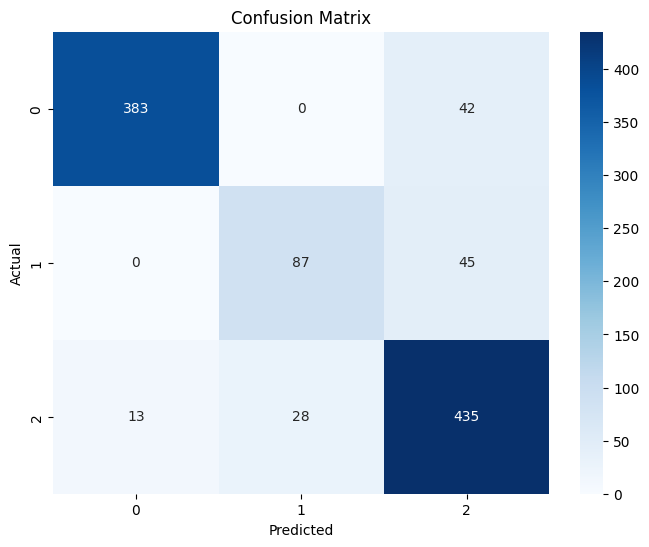

              precision    recall  f1-score   support

        High       0.97      0.90      0.93       425
         Low       0.76      0.66      0.70       132
      Medium       0.83      0.91      0.87       476

    accuracy                           0.88      1033
   macro avg       0.85      0.82      0.84      1033
weighted avg       0.88      0.88      0.88      1033



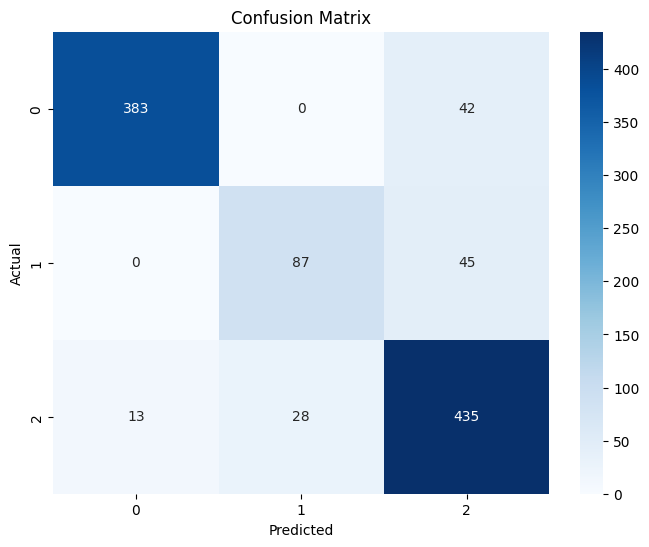

In [45]:
# Train model with the whole dataset
print("Model trained with the whole dataset:")
train_and_evaluate(X, y)


Model trained for males:
              precision    recall  f1-score   support

        High       0.93      0.88      0.90       276
         Low       0.53      0.44      0.48        39
      Medium       0.78      0.85      0.81       231

    accuracy                           0.84       546
   macro avg       0.75      0.72      0.73       546
weighted avg       0.84      0.84      0.83       546



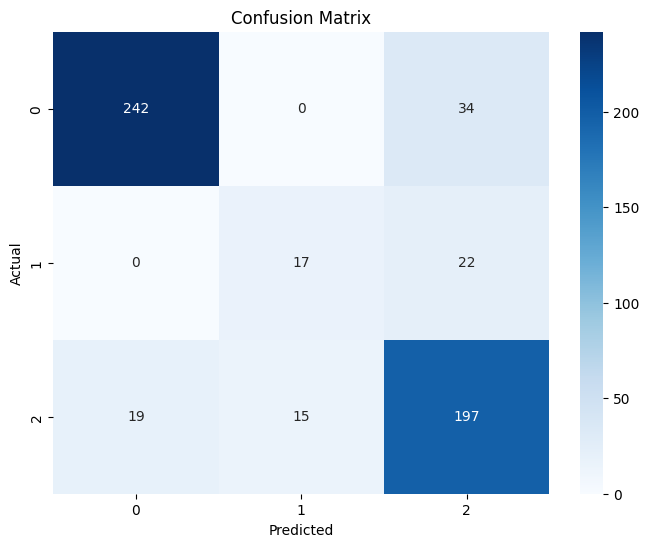

              precision    recall  f1-score   support

        High       0.93      0.88      0.90       276
         Low       0.53      0.44      0.48        39
      Medium       0.78      0.85      0.81       231

    accuracy                           0.84       546
   macro avg       0.75      0.72      0.73       546
weighted avg       0.84      0.84      0.83       546



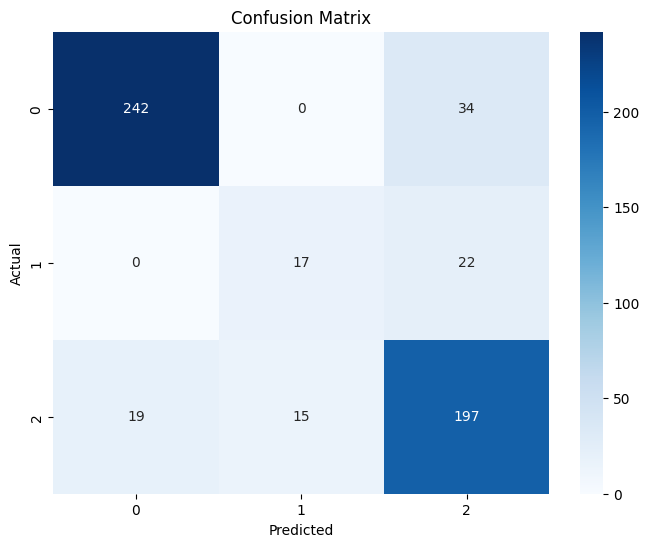

In [46]:
# Train model for males only
male_df = df[df['SEX'] == 1]
X_male = male_df.drop("Average_Salary_Bins", axis=1)
y_male = male_df["Average_Salary_Bins"]
X_male = pd.get_dummies(X_male, columns=non_numeric_columns, drop_first=True)


print("\nModel trained for males:")
train_and_evaluate(X_male, y_male)



Model trained for females:
              precision    recall  f1-score   support

        High       0.90      0.85      0.87       169
         Low       0.71      0.60      0.65        80
      Medium       0.78      0.85      0.81       238

    accuracy                           0.81       487
   macro avg       0.79      0.76      0.78       487
weighted avg       0.81      0.81      0.81       487



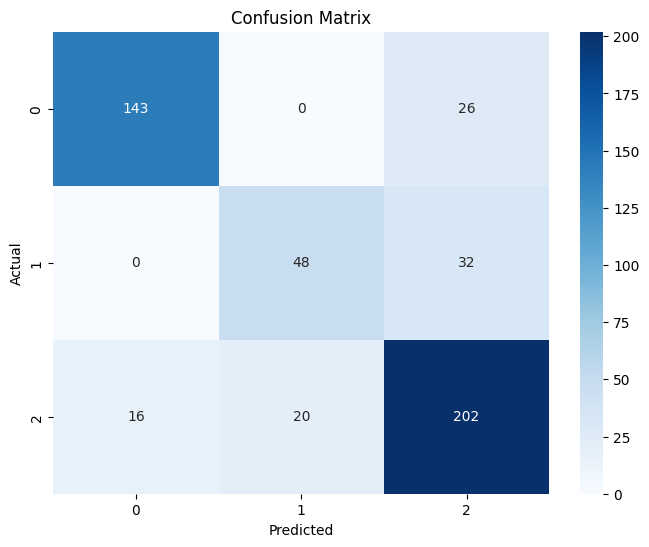

              precision    recall  f1-score   support

        High       0.90      0.85      0.87       169
         Low       0.71      0.60      0.65        80
      Medium       0.78      0.85      0.81       238

    accuracy                           0.81       487
   macro avg       0.79      0.76      0.78       487
weighted avg       0.81      0.81      0.81       487



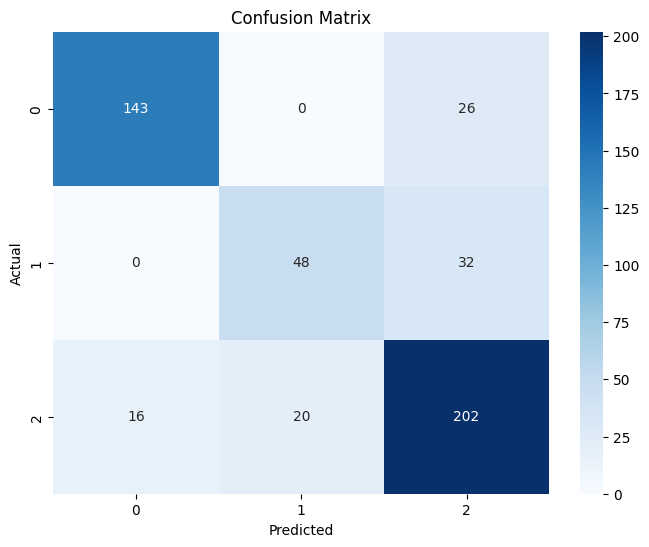

In [47]:
# Train model for females only
female_df = df[df['SEX'] == 0]
X_female = female_df.drop("Average_Salary_Bins", axis=1)
y_female = female_df["Average_Salary_Bins"]
X_female = pd.get_dummies(X_female, columns=non_numeric_columns, drop_first=True)


print("\nModel trained for females:")
train_and_evaluate(X_female, y_female)


Model trained for White(Not of Hispanic Origin):
              precision    recall  f1-score   support

        High       0.95      0.83      0.89       373
         Low       0.70      0.52      0.60        86
      Medium       0.77      0.91      0.83       377

    accuracy                           0.83       836
   macro avg       0.81      0.75      0.77       836
weighted avg       0.84      0.83      0.83       836



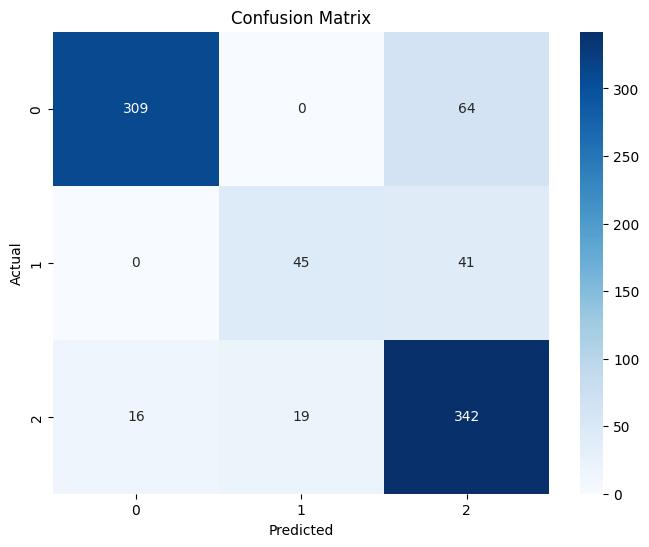

              precision    recall  f1-score   support

        High       0.95      0.83      0.89       373
         Low       0.70      0.52      0.60        86
      Medium       0.77      0.91      0.83       377

    accuracy                           0.83       836
   macro avg       0.81      0.75      0.77       836
weighted avg       0.84      0.83      0.83       836



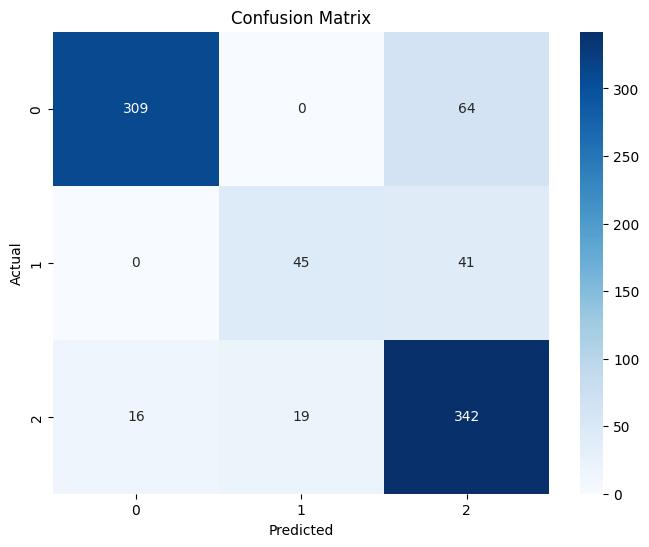

In [48]:
#Training model for "White(Not of Hispanic Origin)" only
white_df = df[df['ETHNICITY'] == 1]
X_white = white_df.drop("Average_Salary_Bins", axis=1)
y_white = white_df["Average_Salary_Bins"]
X_white = pd.get_dummies(X_white, columns=non_numeric_columns, drop_first=True)


print("\nModel trained for White(Not of Hispanic Origin):")
train_and_evaluate(X_white, y_white)


Model trained for Other Ethnicity:
              precision    recall  f1-score   support

        High       0.89      0.71      0.79        69
         Low       0.65      0.67      0.66        30
      Medium       0.73      0.83      0.78        99

    accuracy                           0.76       198
   macro avg       0.76      0.74      0.74       198
weighted avg       0.77      0.76      0.76       198



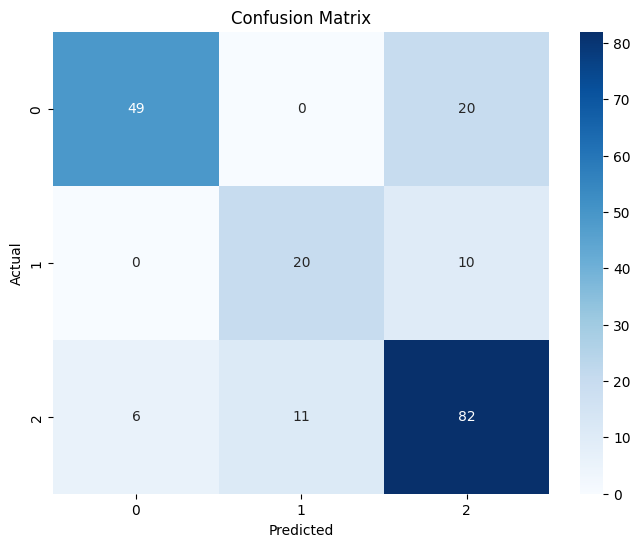

              precision    recall  f1-score   support

        High       0.89      0.71      0.79        69
         Low       0.65      0.67      0.66        30
      Medium       0.73      0.83      0.78        99

    accuracy                           0.76       198
   macro avg       0.76      0.74      0.74       198
weighted avg       0.77      0.76      0.76       198



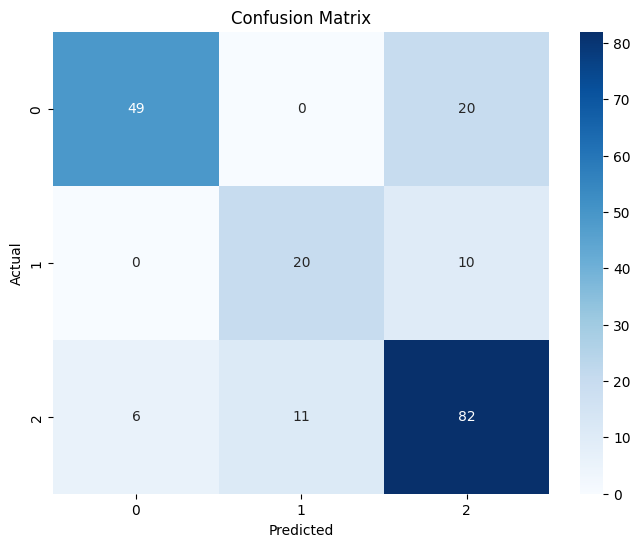

In [49]:
#Training model for other ethnicity only
other_df = df[df['ETHNICITY'] == 0]
X_other = other_df.drop("Average_Salary_Bins", axis=1)
y_other = other_df["Average_Salary_Bins"]
X_other = pd.get_dummies(X_other, columns=non_numeric_columns, drop_first=True)


print("\nModel trained for Other Ethnicity:")
train_and_evaluate(X_other, y_other)


Model trained for Overtime Recieved:
              precision    recall  f1-score   support

        High       0.94      0.89      0.92       331
         Low       0.70      0.51      0.59        73
      Medium       0.83      0.91      0.87       377

    accuracy                           0.87       781
   macro avg       0.82      0.77      0.79       781
weighted avg       0.86      0.87      0.86       781



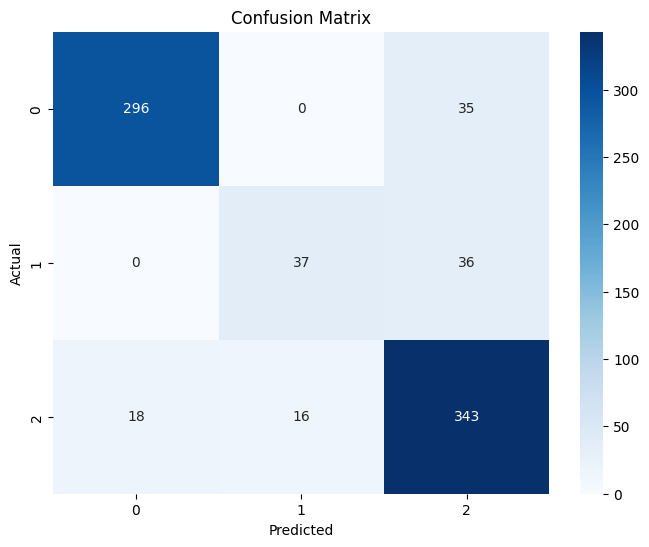

              precision    recall  f1-score   support

        High       0.94      0.89      0.92       331
         Low       0.70      0.51      0.59        73
      Medium       0.83      0.91      0.87       377

    accuracy                           0.87       781
   macro avg       0.82      0.77      0.79       781
weighted avg       0.86      0.87      0.86       781



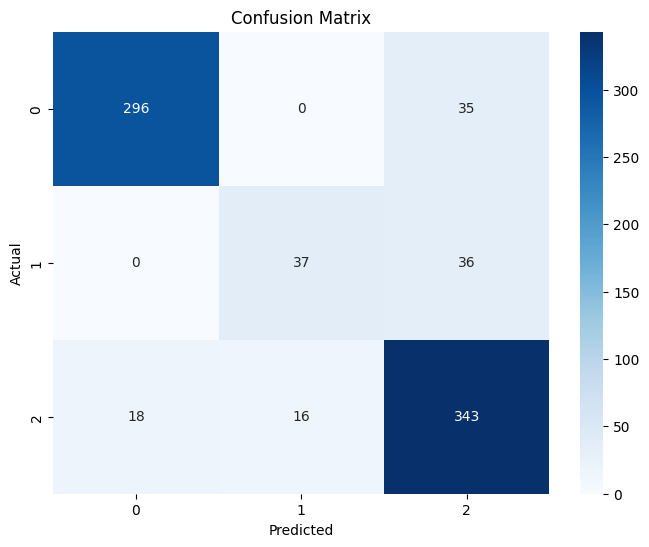

In [50]:
# Train model for overtime only
ot_df = df[df['Received_Overtime_Pay'] == 1]
X_ot = ot_df.drop("Average_Salary_Bins", axis=1)
y_ot = ot_df["Average_Salary_Bins"]
X_ot = pd.get_dummies(X_ot, columns=non_numeric_columns, drop_first=True)


print("\nModel trained for Overtime Recieved:")
train_and_evaluate(X_ot, y_ot)


Model trained for No Overtime Recieved:
              precision    recall  f1-score   support

        High       0.76      0.71      0.73        92
         Low       0.53      0.51      0.52        47
      Medium       0.62      0.67      0.65       113

    accuracy                           0.65       252
   macro avg       0.64      0.63      0.63       252
weighted avg       0.66      0.65      0.66       252



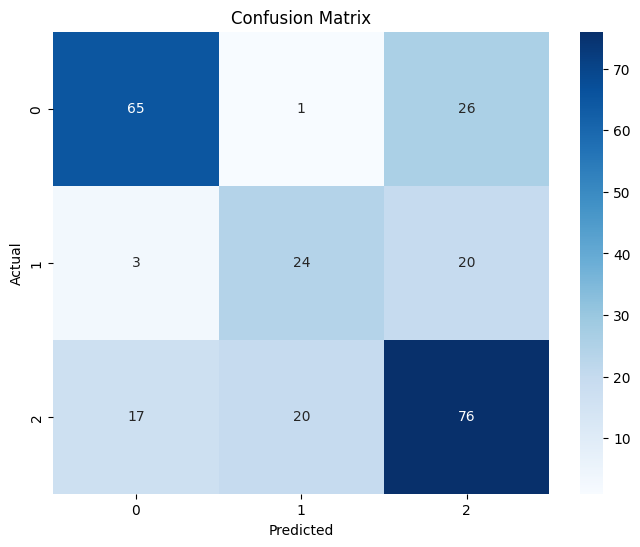

              precision    recall  f1-score   support

        High       0.76      0.71      0.73        92
         Low       0.53      0.51      0.52        47
      Medium       0.62      0.67      0.65       113

    accuracy                           0.65       252
   macro avg       0.64      0.63      0.63       252
weighted avg       0.66      0.65      0.66       252



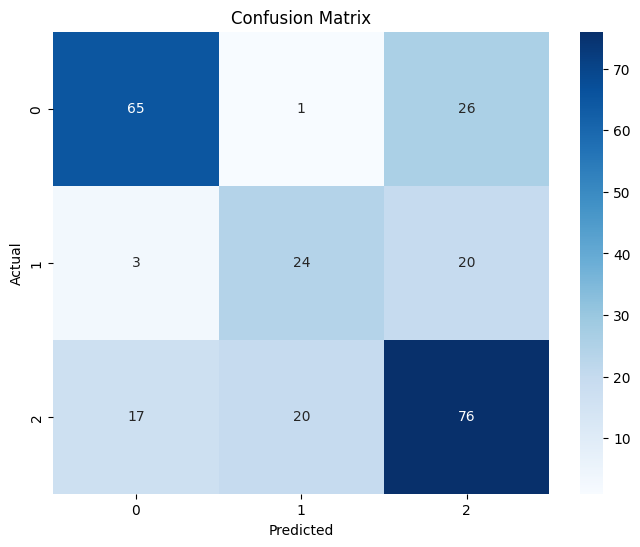

In [51]:
# Train model for non overtime only
nonot_df = df[df['Received_Overtime_Pay'] == 0]
X_nonot = nonot_df.drop("Average_Salary_Bins", axis=1)
y_nonot = nonot_df["Average_Salary_Bins"]
X_nonot = pd.get_dummies(X_nonot, columns=non_numeric_columns, drop_first=True)


print("\nModel trained for No Overtime Recieved:")
train_and_evaluate(X_nonot, y_nonot)